In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
data = pd.read_csv('data/Cleaned/Cleaned_videoData.csv')
data.head()

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,cleaned_title,cleaned_title_ns,start_year,start_month,start_day,trend_year,trend_month,trend_day
0,I ASKED HER TO BE MY GIRLFRIEND...,8/11/2020,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,8/12/2020,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614.0,156908.0,5855.0,35313.0,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,I ASKED HER TO BE MY GIRLFRIEND,ASKED GIRLFRIEND,2020.0,8.0,11.0,2020.0,8.0,12.0
1,Road Rage – Why Motorcycle Riders Smash Windows,8/9/2020,UCNSMdQtn1SuFzCZjfK2C7dQ,FortNine,Autos & Vehicles,8/12/2020,"['motorcycle road rage compilation', 'motorcyc...",342870.0,30254.0,580.0,3124.0,False,False,As the generation that grew up playing Road Ra...,Road Rage Why Motorcycle Riders Smash Windows,Road Rage Motorcycle Riders Smash Windows,2020.0,8.0,9.0,2020.0,8.0,12.0
2,"Whatever You Build, I'll Pay For!",8/6/2020,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,Gaming,8/12/2020,['[none]'],13073796.0,1643982.0,16286.0,97749.0,False,False,We have a giant area of land and whatever you ...,Whatever You Build I ll Pay For,Whatever Build Pay,2020.0,8.0,6.0,2020.0,8.0,12.0
3,"Trump signs executive orders on unemployment, ...",8/8/2020,UCHd62-u_v4DvJ8TCFtpi4GA,Washington Post,News & Politics,8/12/2020,"['debt', 'student loans', 'unemployment aid', ...",523172.0,6045.0,1076.0,5109.0,False,False,After negotiations with Democrats in Congress ...,Trump signs executive orders on unemployment e...,Trump signs executive orders unemployment evic...,2020.0,8.0,8.0,2020.0,8.0,12.0
4,UPDATE: CLAN WARS 2 ⚔️ How does it work? TV Ro...,8/8/2020,UC_F8DoJf9MZogEOU51TpTbQ,Clash Royale,Gaming,8/12/2020,"['clash royale', 'clash royale game', 'superce...",2635254.0,73921.0,2694.0,3447.0,False,False,Clan Wars 2 is coming. Get ahead of the compet...,UPDATE CLAN WARS How does it work TV Royale Cl...,UPDATE CLAN WARS work TV Royale Clash Royale News,2020.0,8.0,8.0,2020.0,8.0,12.0


In [10]:
data.dropna(inplace = True, axis = 0)

In [11]:
sample_data = data.sample(frac = 0.2)
sample_data.shape

(43786, 22)

In [12]:
sample_data['popularity'] = pd.cut(sample_data['view_count'], bins=[0, 1000000, float('inf')], labels=['Low', 'High'])

In [13]:
sample_data['popularity'].value_counts()

popularity
Low     22473
High    21299
Name: count, dtype: int64

In [14]:
cols = ['likes', 'dislikes', 'comment_count', 'popularity']

In [15]:
df = sample_data[cols]
df.head()

,likes,dislikes,comment_count,popularity
244086,28518.0,0.0,1897.0,Low
172003,21054.0,0.0,3753.0,Low
192791,29465.0,0.0,6118.0,High
207377,107044.0,0.0,5897.0,High
225414,12857.0,0.0,972.0,Low


In [16]:
df.dropna(inplace = True, axis = 0)

C:\Users\Sid\AppData\Local\Temp\ipykernel_25024\1009092873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True, axis = 0)


In [17]:
x = df[['likes', 'dislikes', 'comment_count']]
y = df[['popularity']]

In [18]:
y = df['popularity'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
X_train.head()

,likes,dislikes,comment_count
231817,15029.0,0.0,804.0
169350,6773.0,0.0,1631.0
26748,119766.0,1794.0,16230.0
185221,148498.0,0.0,4347.0
108497,8802.0,303.0,654.0


In [20]:
X_test.head()

,likes,dislikes,comment_count
236496,80400.0,0.0,3739.0
225266,39505.0,0.0,1441.0
180554,40349.0,0.0,3160.0
145316,389561.0,0.0,25463.0
38248,365518.0,2866.0,26672.0


In [23]:
y_train

['Low', 'Low', 'High', 'High', 'Low', ..., 'High', 'Low', 'Low', 'Low', 'High']
Length: 35017
Categories (2, object): ['Low' < 'High']

In [24]:
y_test

['High', 'Low', 'Low', 'High', 'High', ..., 'High', 'High', 'Low', 'High', 'Low']
Length: 8755
Categories (2, object): ['Low' < 'High']

In [63]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [64]:
def evaluate_and_plot(model, X_test, y_test, kernel_name, cost):
    # Predictions
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['Low', 'High'], title=f'Confusion Matrix ({kernel_name} Kernel, Cost={cost})')

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy ({kernel_name} Kernel): {acc:.2f}')
    print(f'CM: {kernel_name} - {cm}')

    # Save the confusion matrix plot as a jpg file in a separate directory
    save_dir = 'confusion_matrix_plots'
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f'{kernel_name}_{cost}.jpg')

    # Clear the current figure to start with a fresh one
    plt.clf()

    # Save the figure directly without closing it
    plt.savefig(save_path)

    # Calculate and print classification report
    class_report = classification_report(y_test, y_pred, target_names=['Low', 'High'])
    print(f'Classification Report ({kernel_name} Kernel, Cost={cost}):')
    print(class_report)


# Try different kernels and costs
kernels = ['linear', 'rbf', 'poly']
costs = [1, 10, 100]

In [65]:
# Specify the directory to save the files
save_dir = 'confusion_matrix_plots_svm_videos'
os.makedirs(save_dir, exist_ok=True)

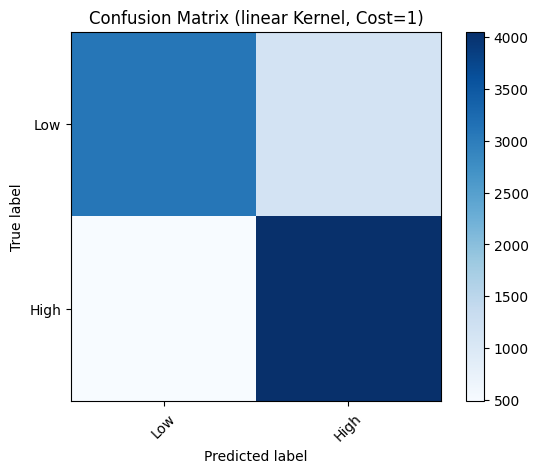

Accuracy (linear Kernel): 0.81
CM: linear - [[3082 1135]
 [ 488 4050]]
Classification Report (linear Kernel, Cost=1):
              precision    recall  f1-score   support

         Low       0.86      0.73      0.79      4217
        High       0.78      0.89      0.83      4538

    accuracy                           0.81      8755
   macro avg       0.82      0.81      0.81      8755
weighted avg       0.82      0.81      0.81      8755



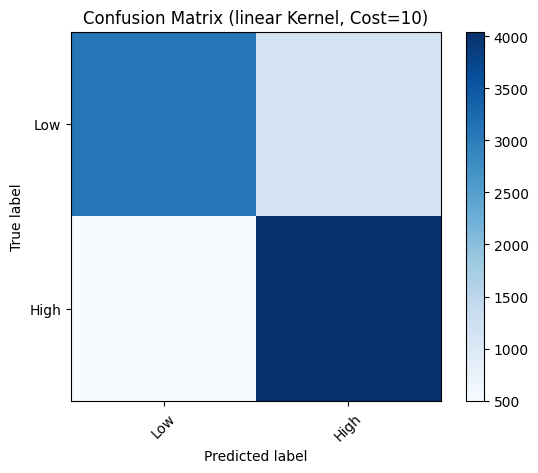

Accuracy (linear Kernel): 0.82
CM: linear - [[3093 1124]
 [ 493 4045]]
Classification Report (linear Kernel, Cost=10):
              precision    recall  f1-score   support

         Low       0.86      0.73      0.79      4217
        High       0.78      0.89      0.83      4538

    accuracy                           0.82      8755
   macro avg       0.82      0.81      0.81      8755
weighted avg       0.82      0.82      0.81      8755



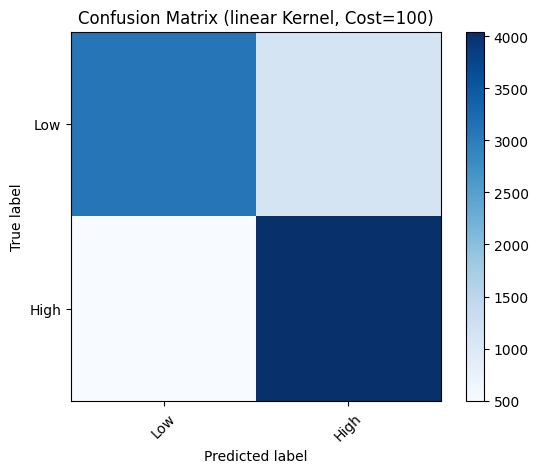

Accuracy (linear Kernel): 0.82
CM: linear - [[3094 1123]
 [ 493 4045]]
Classification Report (linear Kernel, Cost=100):
              precision    recall  f1-score   support

         Low       0.86      0.73      0.79      4217
        High       0.78      0.89      0.83      4538

    accuracy                           0.82      8755
   macro avg       0.82      0.81      0.81      8755
weighted avg       0.82      0.82      0.81      8755



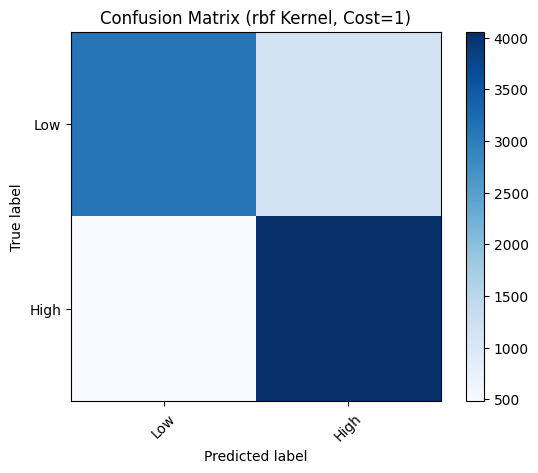

Accuracy (rbf Kernel): 0.82
CM: rbf - [[3083 1134]
 [ 480 4058]]
Classification Report (rbf Kernel, Cost=1):
              precision    recall  f1-score   support

         Low       0.87      0.73      0.79      4217
        High       0.78      0.89      0.83      4538

    accuracy                           0.82      8755
   macro avg       0.82      0.81      0.81      8755
weighted avg       0.82      0.82      0.81      8755



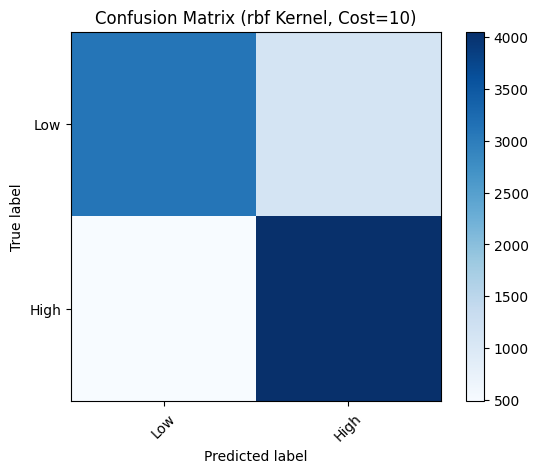

Accuracy (rbf Kernel): 0.82
CM: rbf - [[3095 1122]
 [ 487 4051]]
Classification Report (rbf Kernel, Cost=10):
              precision    recall  f1-score   support

         Low       0.86      0.73      0.79      4217
        High       0.78      0.89      0.83      4538

    accuracy                           0.82      8755
   macro avg       0.82      0.81      0.81      8755
weighted avg       0.82      0.82      0.81      8755



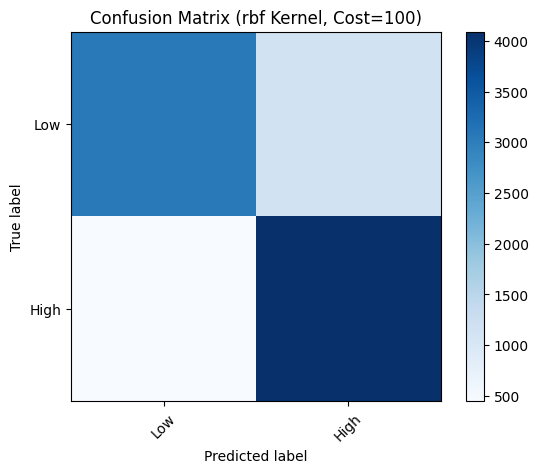

Accuracy (rbf Kernel): 0.82
CM: rbf - [[3065 1152]
 [ 447 4091]]
Classification Report (rbf Kernel, Cost=100):
              precision    recall  f1-score   support

         Low       0.87      0.73      0.79      4217
        High       0.78      0.90      0.84      4538

    accuracy                           0.82      8755
   macro avg       0.83      0.81      0.81      8755
weighted avg       0.82      0.82      0.82      8755



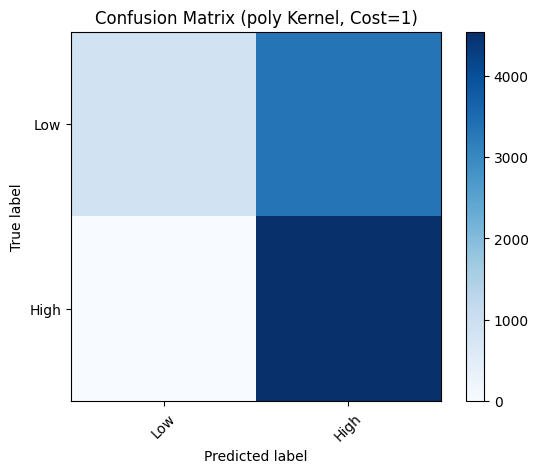

Accuracy (poly Kernel): 0.62
CM: poly - [[ 868 3349]
 [   0 4538]]
Classification Report (poly Kernel, Cost=1):
              precision    recall  f1-score   support

         Low       1.00      0.21      0.34      4217
        High       0.58      1.00      0.73      4538

    accuracy                           0.62      8755
   macro avg       0.79      0.60      0.54      8755
weighted avg       0.78      0.62      0.54      8755



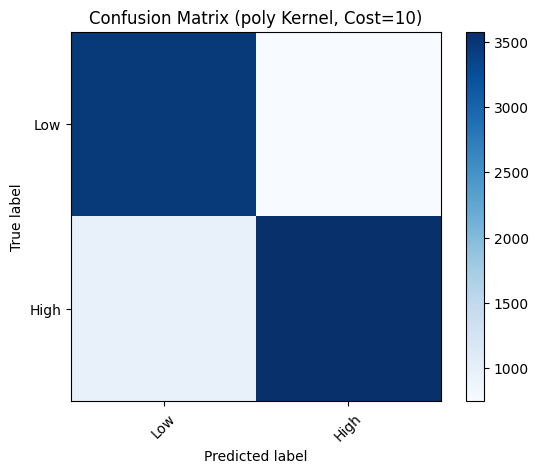

Accuracy (poly Kernel): 0.80
CM: poly - [[3470  747]
 [ 961 3577]]
Classification Report (poly Kernel, Cost=10):
              precision    recall  f1-score   support

         Low       0.78      0.82      0.80      4217
        High       0.83      0.79      0.81      4538

    accuracy                           0.80      8755
   macro avg       0.81      0.81      0.80      8755
weighted avg       0.81      0.80      0.80      8755



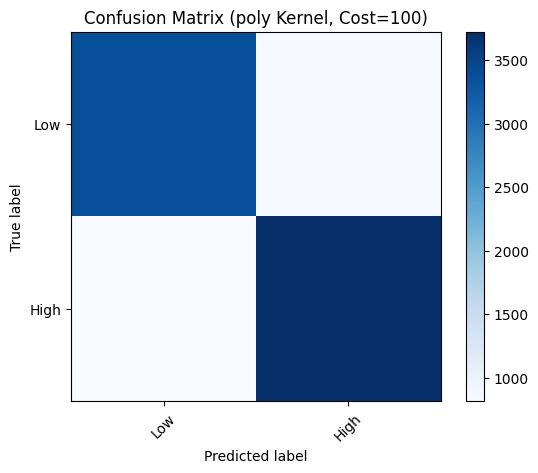

Accuracy (poly Kernel): 0.81
CM: poly - [[3374  843]
 [ 815 3723]]
Classification Report (poly Kernel, Cost=100):
              precision    recall  f1-score   support

         Low       0.81      0.80      0.80      4217
        High       0.82      0.82      0.82      4538

    accuracy                           0.81      8755
   macro avg       0.81      0.81      0.81      8755
weighted avg       0.81      0.81      0.81      8755



<Figure size 640x480 with 0 Axes>

In [66]:
for kernel in kernels:
    for cost in costs:
        # Create SVM model with specified kernel and cost
        clf = svm.SVC(kernel=kernel, C=cost)

        # Create a pipeline with standardization
        model = make_pipeline(StandardScaler(), clf)

        # Fit the model
        model.fit(X_train, y_train)

        # Evaluate and plot results
        evaluate_and_plot(model, X_test, y_test, kernel, cost)